In [1]:
# download example data
!pip install gdown
from downloaddata import download_example_data
download_example_data()
%config Completer.use_jedi = False

Please use pip3 instead of pip to install packages for python3


In [6]:
from wholeslidedata.image.wholeslideimage import WholeSlideImage
path_to_wsi = "/tmp/TCGA-21-5784-01Z-00-DX1.tif"

## WholeSlideImage

In [7]:
from wholeslidedata.image.wholeslideimage import WholeSlideImage

# open a WSI
with WholeSlideImage(path_to_wsi, backend='openslide') as wsi:
    print('\n\nWSI properties\n---------------\n')
    # print some properties
    print(f'available spacing in {wsi.path}:\n{wsi.spacings}\n')
    print(f'shapes in {wsi.path}:\n{wsi.shapes}\n')
    print(f'downsampling ratios in {wsi.path}:\n{wsi.downsamplings}\n')
    print(f'closest real spacing from rounded spacing: 0.5 = {wsi.get_real_spacing(0.5)}\n')
    print(f'size given spacing: shape at spacing 0.5 = {wsi.shapes[wsi.get_level_from_spacing(0.5)]}\n')



WSI properties
---------------

available spacing in /tmp/TCGA-21-5784-01Z-00-DX1.tif:
[0.5054008216842545, 1.0108352937951, 2.0217254523901094, 4.043450904780219, 8.088178124603436, 16.179869312415683, 32.373809206692044]

shapes in /tmp/TCGA-21-5784-01Z-00-DX1.tif:
((36851, 25353), (18425, 12676), (9212, 6338), (4606, 3169), (2303, 1584), (1151, 792), (575, 396))

downsampling ratios in /tmp/TCGA-21-5784-01Z-00-DX1.tif:
(1.0, 2.000066581661816, 4.00024172032939, 8.00048344065878, 16.003492233450437, 32.01393551062317, 64.05571146245059)

closest real spacing from rounded spacing: 0.5 = 0.5054008216842545

size given spacing: shape at spacing 0.5 = (36851, 25353)



## Example Patch/Slide Extraction



Patch and Slide extraction
---------------



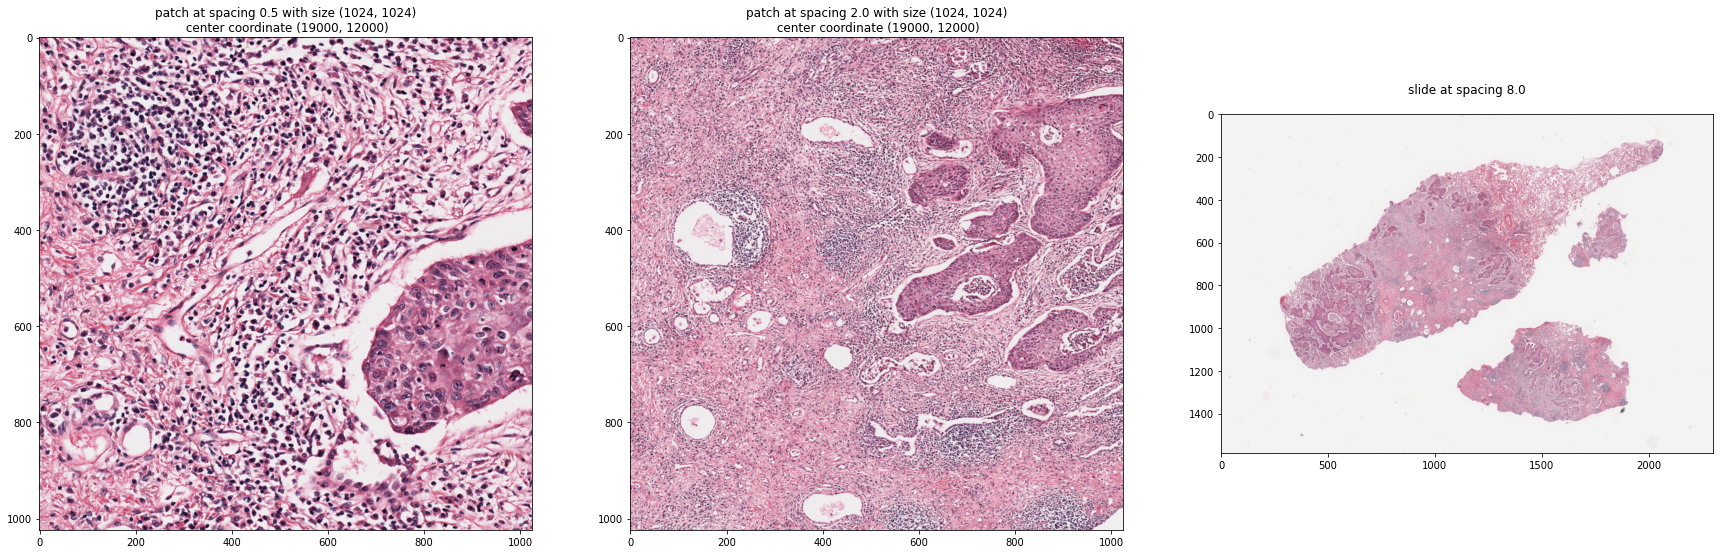

In [8]:
from matplotlib import pyplot as plt
from wholeslidedata.image.wholeslideimage import WholeSlideImage
"""
The WholeSlideImage class can also be used to extract patches.

"""

x,y = 19000, 12000
width, height = 1024, 1024


print('\n\nPatch and Slide extraction\n---------------\n')
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

with WholeSlideImage(path_to_wsi, backend='openslide') as wsi:
    # extract a patch with center coordinates xy at spacing 0.5
    spacing = 0.5
    patch = wsi.get_patch(x, y, width, height, spacing)

    # plot patch
    axes[0].imshow(patch)
    axes[0].set_title(f'patch at spacing {spacing} with size {width, height}\n center coordinate {x,y}')

    spacing = 2.0
    # extract a patch with center coordinates xy at spacing 2.0
    patch = wsi.get_patch(x, y, width, height, spacing)

    # plot patch
    axes[1].imshow(patch)
    axes[1].set_title(f'patch at spacing {spacing} with size {width, height}\n center coordinate {x,y}')

    # extract the whole slide
    slide_spacing=8.0
    slide = wsi.get_slide(spacing=slide_spacing)

    axes[2].imshow(slide)
    axes[2].set_title(f'slide at spacing {slide_spacing}\n')
    plt.show()
